# Sentence Embeddings using Siamese BERT-Networks

The Sentence Transformer library is available on [pypi](https://pypi.org/project/sentence-transformers/) and [github](https://github.com/UKPLab/sentence-transformers). The library implements code from the ACL 2019 paper entitled "[Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://www.aclweb.org/anthology/D19-1410.pdf)" by Nils Reimers and Iryna Gurevych.


## Install Sentence Transformer Library

In [35]:
#!conda install -c conda-forge sentence-transformers -y

## Load the BERT Model

In [36]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import pytorch_cos_sim
import numpy as np
#np.corrcoef(sentence_embeddings).shape

import matplotlib.pyplot as plt
%matplotlib inline
# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('stsb-mpnet-base-v2')


## Setup a Corpus

In [37]:
### image

sentences2 = ['I like my phone.',
'Your cellphone looks great.',
'Will it snow tomorrow?',
'Hurricanes have hit the US.',
'How old are you?',
'What is your age?',
'You are powerful, elegant, and in control. Do not let a text disrupt that grace on the road. Drive now, chat later',
'The UAE celebrates our strength and progress. Let us champion safety too. Prioritize life over a text.',
'Striding forward with style and purpose? The road is your runway. Keep it classy and safe. Avoid texting while driving.',
'Your journey, your rules. But remember, in the dance of life, safety always takes the lead. Stay focused.',
'The story of UAE women is one of ambition and inspiration. Do not let a text interrupt your legacy. Your message and future can wait']

sentence_embeddings2 = model.encode(sentences2)


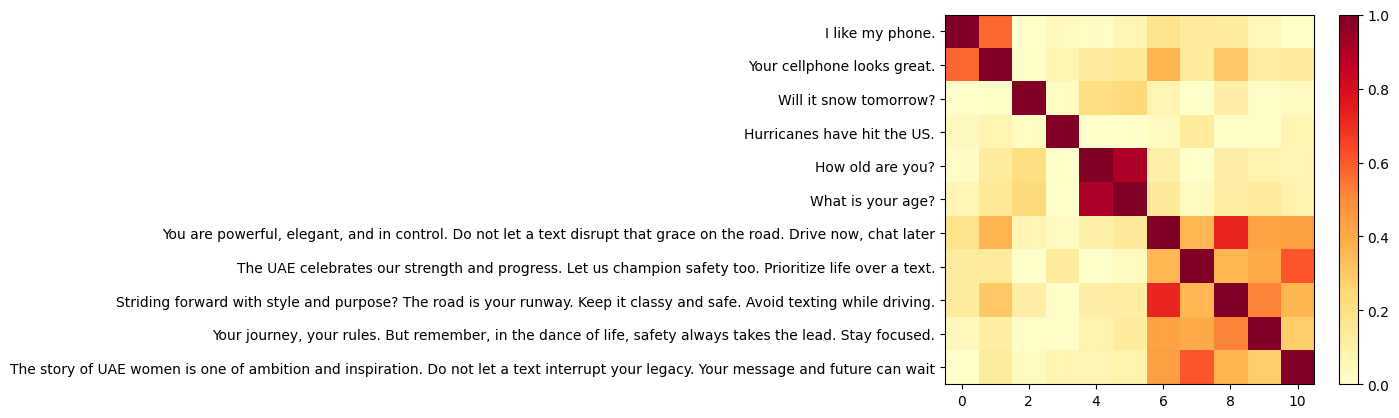

In [38]:
matcos2 = np.zeros((len(sentences2),len(sentences2)))
for i in range(len(sentences2)):
  for j in range (len(sentences2)):
    matcos2[i,j] = pytorch_cos_sim(sentence_embeddings2[i,:], sentence_embeddings2[j,:])

#np.fill_diagonal(matcos2, np.NaN)


fig, ax = plt.subplots()
im = ax.imshow(matcos2, cmap = 'YlOrRd', vmin = 0, vmax = 1);

ax.set_yticks(np.arange(len(sentences2)))
ax.set_yticklabels(sentences2)

fig.colorbar(im, ax=ax)
plt.show()

In [39]:
# A corpus is a list with documents split by sentences.

#top 30 are AI-gen (with prompts), bottom 30 are human

sentences = [ "Every message home matters, but your safety here is just as crucial. Drive first, text later. Your loved ones would agree. ",
 "Hard work brought you to the UAE. Don't let a text undo all you've achieved. Stay focused on the road. ",
 "Building dreams in the UAE? Every text while driving risks those dreams. Let's be safe for our families and futures. ",
 "In the heart of the desert or the city's pulse, the UAE's roads demand respect. One text can change everything. Drive first, chat later. ",
 "We all journey to the UAE for a brighter tomorrow. Don't let a text darken that path. Your family and future are worth the wait. ",
 "You're powerful, elegant, and in control. Don't let a text disrupt that grace on the road. Drive now, chat later ",
 "The UAE celebrates our strength and progress. Let's champion safety too. Prioritize life over a text. ",
 "Striding forward with style and purpose? The road is your runway. Keep it classy and safe. Avoid texting while driving. ",
 "Your journey, your rules. But remember, in the dance of life, safety always takes the lead. Stay focused. ",
 "The story of UAE women is one of ambition and inspiration. Don't let a text interrupt your legacy. Your message and future can wait ",
 "In the UAE, our heritage is rooted in our sense of pride and responsibility. Don't let a text tarnish that. Stay focused on the road. ",
 "Between the dunes and the skyscrapers, our nation's beauty is unmatched. Don't miss it for a text. Your life and the views are too precious. ",
 "Driving is a privilege, not a time to chat. Remember the spirit of the UAE: respect, integrity, and excellence. Keep the phone down and uphold our values. ",
 "We're the future of the Emirates. Let's not let a text cut that short. Protect our legacy and drive safely. ",
 "Your destination in our beautiful UAE awaits, but it's not worth the risk of a text. Get there safely and cherish every moment. ",
 "Think about your family back home. Put down that phone and keep your eyes on the road ",
 "A text is not worth everything you’ve worked for. Put down your phone - don’t text and drive ",
 "Moussa (44): “I wanted to just send one text to my people at home. Now I lost everything. I say no to texting and driving ",
 "Be a multitasker at your workplace, not on the streets. Don’t text and drive! ",
 "Think about everything you’ve worked for. Your phone can wait - keep your eyes on the road ",
 "In a split second, your children will no longer have a mother - don’t text and drive ",
 "Women are more responsible drivers- they don’t text and drive! ",
 "Fatima (30): “I just had gotten my new car and was distracted by this one text message. Now my car is a wreck and they’re saying women are bad drivers. I will not text and drive again ",
 "Protect the people you love and support - don’t text and drive ",
 "Protect your freedom and safety - don't text and drive ",
 "In a split second, you could tear a large hole in your parents’ hearts- don’t text and drive ",
 "Show them that young drivers are better drivers - don’t text and drive ",
 "Tarek (21, Dubai): “Us young drivers are the future: It’s on us to change the culture around texting and driving. #itcanwait” ",
 "I ignored those warnings about texting while driving because everyone else was doing it. So I thought it was okay. I thought I was invincible. But clearly, I was completely wrong ",
 "In a split second, you could ruin your future - don’t text and drive "]

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [-3.55711952e-02 -2.02628702e-01 -4.48700972e-02  3.88959162e-02
  1.82685461e-02 -2.51592118e-02  8.48626271e-02  4.20363882e-04
 -1.49413154e-01  7.55117908e-02 -3.01844385e-02 -1.92971528e-02
  4.12589647e-02  7.75737688e-02 -3.41290832e-02  4.57412042e-02
 -3.92516255e-02 -1.22027241e-01  1.64049909e-01  7.34516531e-02
  6.89645484e-02 -2.62996089e-02  9.49798822e-02 -1.88360903e-02
 -6.23708442e-02  5.59146516e-02  1.04035065e-02 -1.73922237e-02
  1.29661977e-01  1.38255311e-02  1.02381229e-01  9.94739905e-02
  6.02021739e-02 -1.05927289e-01  1.45937175e-01  2.12832689e-01
  3.57452407e-02 -7.07286149e-02 -1.18034765e-01 -2.14804158e-01
  1.84895277e-01  4.72222902e-02  6.51414022e-02  8.04966167e-02
  3.06217540e-02  1.35911524e-01  3.03510930e-02  3.33950184e-02
  1.97074756e-01 -1.40672699e-02 -7.79209509e-02  7.94423893e-02
  2.43019417e-01  1.01394996e-01  5.50043918e-02  9.

In [40]:
sentence_embeddings.shape

(30, 768)

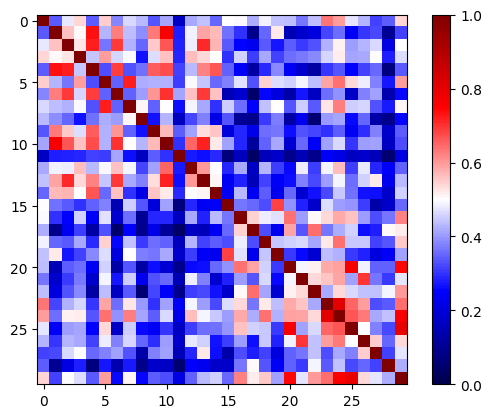

In [41]:
plt.imshow(np.corrcoef(sentence_embeddings)[:, :], cmap = 'seismic', vmin = 0, vmax = 1);
plt.colorbar()

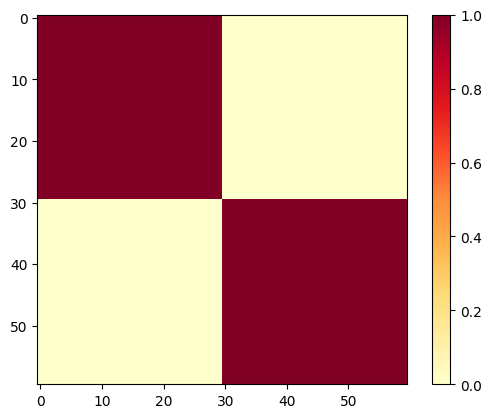

In [42]:
hypo = np.zeros((60,60))
hypo[:30,:30] = 1
hypo[30:,30:] = 1
plt.imshow(hypo, cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()

In [43]:
mat = np.corrcoef(sentence_embeddings)

m1 = mat[:30, :30]
m1.shape

(30, 30)

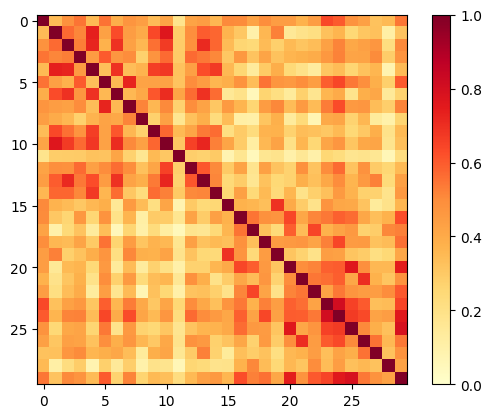

array([[1.        , 0.99999669],
       [0.99999669, 1.        ]])

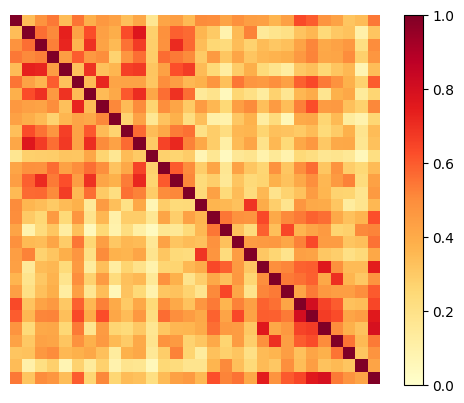

In [44]:
matcos = np.zeros((30,30))
for i in range(30):
  for j in range (30):
    matcos[i,j] = pytorch_cos_sim(sentence_embeddings[i,:], sentence_embeddings[j,:])

plt.imshow(matcos, cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()
plt.show()

plt.imshow(np.corrcoef(sentence_embeddings)[:, :], cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()
import seaborn as sns

sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

import nilearn.connectome

cos = nilearn.connectome.sym_matrix_to_vec(matcos, discard_diagonal=True)
cor = nilearn.connectome.sym_matrix_to_vec(mat, discard_diagonal=True)
np.corrcoef(cos, cor)

In [45]:
import nilearn.connectome
aigens = nilearn.connectome.sym_matrix_to_vec(matcos[:15, :15], discard_diagonal=True)
humans = nilearn.connectome.sym_matrix_to_vec(matcos[15:, 15:], discard_diagonal=True)
aitohum = nilearn.connectome.sym_matrix_to_vec(matcos[15:, :15], discard_diagonal=True)

print(np.mean(aigens))
print(np.mean(humans))
print(np.mean(aitohum))


0.4734634451922916
0.4568305576131457
0.3584930037458738


In [46]:
aimeans  =  np.nanmean(matcos[:15, :15], axis = 0)
hummeans =  np.nanmean(matcos[15:, 15:], axis = 0)
aitohummeans  =  np.nanmean(matcos[15:, :15], axis = 0)

print(np.mean(aimeans))
print(np.mean(hummeans))
print(np.mean(aitohummeans))

from scipy import stats
print(stats.ttest_ind(aimeans, hummeans))
print(stats.ttest_ind(aimeans, aitohummeans))
print(stats.ttest_ind(aitohummeans, hummeans))


0.5085658813847436
0.4930418524477217
0.33211759729517826
TtestResult(statistic=0.6016724555480161, pvalue=0.5522331587946903, df=28.0)
TtestResult(statistic=6.004680147597977, pvalue=1.8071672438898654e-06, df=28.0)
TtestResult(statistic=-5.473622793030805, pvalue=7.611463879481149e-06, df=28.0)


In [47]:
np.nanmean(matcos)

0.4164607321057055